# Exercise Practice 1 - Structured Dataset



---

---





## Exploratory Data Analysis (EDA)
Exploratory Data Analysis mengacu pada proses kritis melakukan penyelidikan awal pada data untuk menemukan pola, untuk menemukan anomali, untuk menguji hipotesis (statistik inferentif) dan untuk memeriksa asumsi dengan bantuan statistik deskriptif dan representasi grafis. [source](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)
- Matplotlib
- Seaborn
- Pandas
- Other Plotting Library

In [45]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import Normalizer, OneHotEncoder, StandardScaler,MinMaxScaler


### Exploring The Data

In [46]:
# # Read dataset - Iris
df = pd.read_csv('/content/drive/MyDrive/dataset_ml/iris_dataset.csv')

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# select with no duplicated data
df = df[~df.duplicated()]

In [49]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   target             149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


In [50]:
# Number of Unqie Value in Every Columns
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
target                3
dtype: int64

### Describe The Data

In [51]:
df.describe() # Hanya menjalankan kolom dengan data numerik

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [52]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Data collection

In [53]:
datasets_1 = np.genfromtxt('/content/drive/MyDrive/dataset_ml/iris_dataset.csv', delimiter=',', dtype=str)

column_names = datasets_1[0]
data = datasets_1[1:]

df = pd.DataFrame(data, columns=column_names)


In [54]:
from numpy import unique
for i in range(df.shape[1]):
    if len(unique(df.iloc[:, i])) <= 1:
        print(i)
    else:
        print(i, len(unique(df.iloc[:, i])))


0 35
1 23
2 43
3 22
4 3


In [55]:
print(df.shape)
for a in column_names:
    df = df[df[a].str.contains('\?') == False]

print(df.shape)
df.drop_duplicates()
df.dropna()
df.isnull().sum()
print(df.shape)

(150, 5)
(150, 5)
(150, 5)


Text(0.5, 1.0, 'Histogram of Sepal Width')

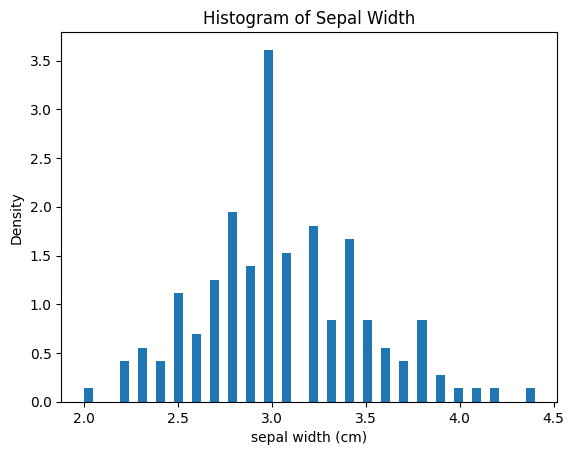

In [56]:
df['sepal width (cm)'] = pd.to_numeric(df['sepal width (cm)'], errors='coerce')

ax = df['sepal width (cm)'].plot.hist(bins=50, density=True)

ax.set_xlabel('sepal width (cm)')
ax.set_ylabel('Density')
ax.set_title('Histogram of Sepal Width')

Removing outliers

In [57]:
#tidak ada data yang mau saya hapus dari dataset
data = df.to_numpy()
y = data[:,-1].copy()
np.random.seed(5)
np.random.shuffle(data)

 Feature selection is done in this step that Education-num is deleted for the repetition.

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

categorical_features=[0,1,2,3,4]
categorical_names = {}
for feature in categorical_features:
    le = LabelEncoder()
    le.fit(data[:, feature])
    data[:, feature] = le.transform(data[:, feature])
    categorical_names[feature] = le.classes_


t = [('cat', OneHotEncoder(),[0,1,2,3,4])]

transformer = ColumnTransformer(transformers=t)
le= LabelEncoder()
y = le.fit_transform(y)
class_names = le.classes_
data = data.astype(float)

data_1 = data[0:3000]
y_1 = y[0:3000]

In [59]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Pie Diagram

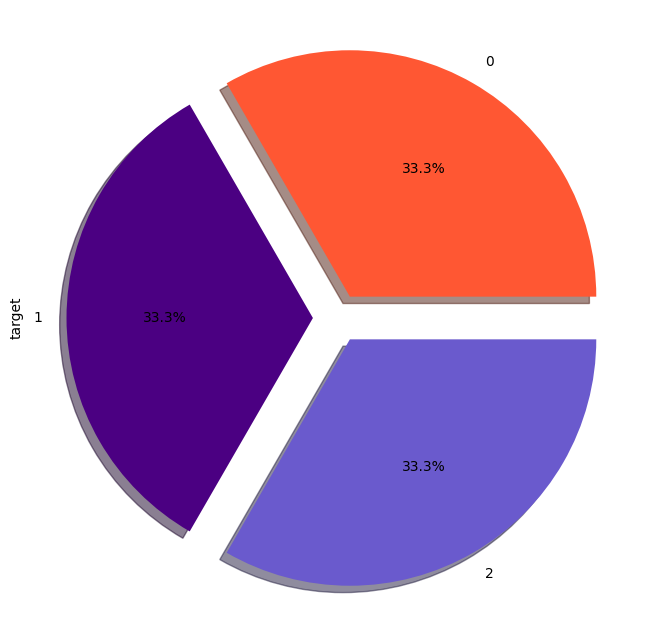

0 = Setosa Iris
1 = Versicolor Iris
2 = Virginica Iris


In [60]:
# Pandas plotting with matplotlib
colors = ['#ff5733','#4b0082','#6a5acd']
df['target'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8),colors=colors)
plt.show()
print ('0 = Setosa Iris')
print ('1 = Versicolor Iris')
print ('2 = Virginica Iris')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    object 
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    object 
 3   petal width (cm)   150 non-null    object 
 4   target             150 non-null    object 
dtypes: float64(1), object(4)
memory usage: 7.0+ KB


In [62]:
df['sepal width (cm)'] = df['sepal width (cm)'].astype(str).str.split('.').str[0].astype(int)
df['sepal length (cm)'] = df['sepal length (cm)'].astype(str).str.split('.').str[0].astype(int)
df['petal width (cm)'] = df['petal width (cm)'].astype(str).str.split('.').str[0].astype(int)
df['petal length (cm)'] = df['petal length (cm)'].astype(str).str.split('.').str[0].astype(int)
df['target'] = df['target'].astype(str).astype(int)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sepal length (cm)  150 non-null    int64
 1   sepal width (cm)   150 non-null    int64
 2   petal length (cm)  150 non-null    int64
 3   petal width (cm)   150 non-null    int64
 4   target             150 non-null    int64
dtypes: int64(5)
memory usage: 7.0 KB


### Boxplot
[Deskripsi Boxplot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

![image.png](https://miro.medium.com/max/656/1*2c21SkzJMf3frPXPAR_gZA.png)


0 = Setosa Iris
1 = Versicolor Iris
2 = Virginica Iris


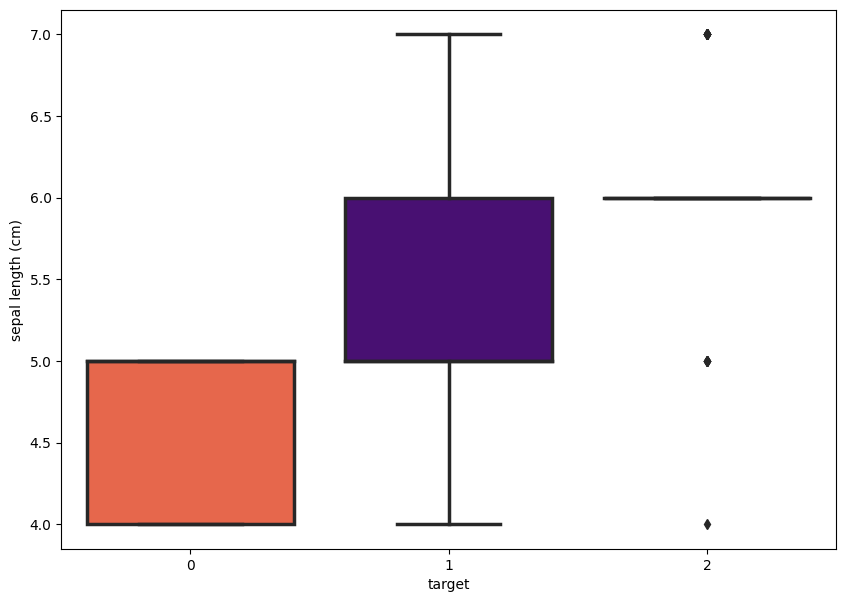

In [64]:

fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='target', y='sepal length (cm)', data=df, linewidth=2.5,palette=('#ff5733','#4b0082','#6a5acd'))
print ('0 = Setosa Iris')
print ('1 = Versicolor Iris')
print ('2 = Virginica Iris')

### Countplot and Barplot (with subplot)

`Countplot digunakan untuk menghitung jumlah sample, sedangkan Barplot salah satunya digunakan untuk menghitung rate/prosentase dari sample.`

0 = Setosa Iris
1 = Versicolor Iris
2 = Virginica Iris


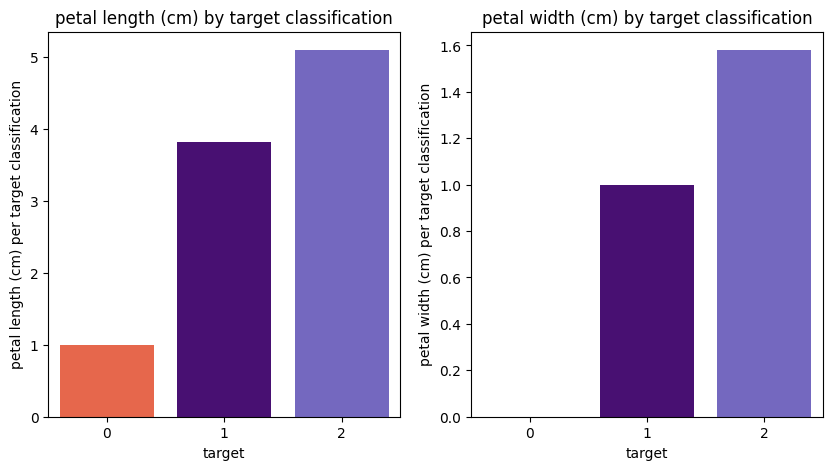

In [65]:
fig, axarr = plt.subplots(1, 2, figsize=(10,5))
#a = sns.countplot(df['Age'], ax=axarr[0], palette=('#003f7f','#ff007f')).set_title('Income count by Age')
axarr[0].set_title('petal length (cm) by target classification')
axarr[1].set_title('petal width (cm) by target classification')

a = sns.barplot(x='target', y='petal length (cm)', data=df, palette=('#ff5733','#4b0082','#6a5acd'), errorbar=None, ax=axarr[0]).set_ylabel('petal length (cm) per target classification')
b = sns.barplot(x='target', y='petal width (cm)', data=df, palette=('#ff5733','#4b0082','#6a5acd'), errorbar=None, ax=axarr[1]).set_ylabel('petal width (cm) per target classification')
print ('0 = Setosa Iris')
print ('1 = Versicolor Iris')
print ('2 = Virginica Iris')


0 = Setosa Iris
1 = Versicolor Iris
2 = Virginica Iris


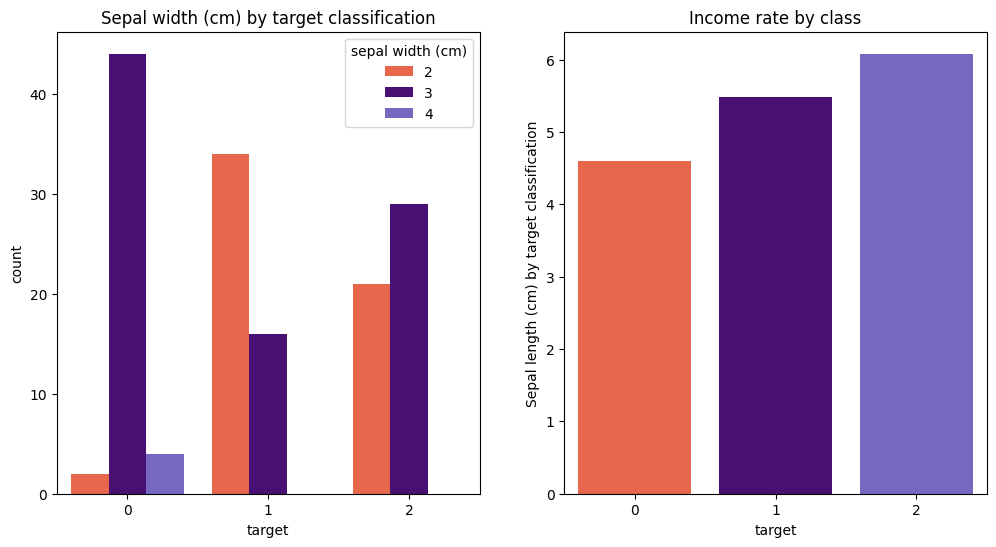

In [66]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(x='target', hue='sepal width (cm)', data=df, palette=('#ff5733','#4b0082','#6a5acd'), ax=axarr[0]).set_title('Sepal width (cm) by target classification')
ax=axarr[1].set_title('Income rate by class')
b = sns.barplot(x='target', y='sepal length (cm)', data=df, palette=('#ff5733','#4b0082','#6a5acd'), errorbar=None, ax=axarr[1]).set_ylabel('Sepal length (cm) by target classification')
print ('0 = Setosa Iris')
print ('1 = Versicolor Iris')
print ('2 = Virginica Iris')

## Methods for Encoding [1](https://towardsdatascience.com/how-to-encode-categorical-data-d44dde313131) & [2](https://towardsdatascience.com/5-categorical-encoding-tricks-you-need-to-know-today-as-a-data-scientist-73cf75595298) Before Modeling


- **Label Encoding** adalah pengubahan label menjadi bentuk numerik untuk mengubahnya menjadi bentuk yang dapat dibaca mesin. Algoritma pembelajaran mesin kemudian dapat memutuskan dengan cara yang lebih baik tentang bagaimana label tersebut harus dioperasikan.
- **One Hot Encoding** adalah proses yang dikenal sebagai pengkodean variabel kategori menjadi variabel dummy. Metode pengolahan data ini mengubah kolom kategorikal biner (yes / no, male / female,…) menjadi vektor biner 0/1 dimana 0 menunjukkan tidak adanya baris yang termasuk dalam kategori tersebut. Metode ini bisa rumit jika digunakan untuk variabel multidimensi non-biner yang akan menghasilkan penambahan kolom yang tidak berguna. Misalnya, jika kita memiliki kolom yang mewakili x warna, satu pengkodean panas akan menghasilkan x kolom tambahan (warna_hijau, warna_biru,…).
- dll

In [67]:
dataset = df.copy()
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5,3,1,0,0
1,4,3,1,0,0
2,4,3,1,0,0
3,4,3,1,0,0
4,5,3,1,0,0


In [68]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder() # method initialization

# Looping for columns except Survived
for c in dataset.columns[1:]:
    if(dataset[c].dtype=='object'): # if column type = object (like "Tiket" and "Sex")
        dataset[c] = encoder.fit_transform(dataset[c])
    else: # else get the self column value without encode
        dataset[c] = dataset[c]

dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5,3,1,0,0
1,4,3,1,0,0
2,4,3,1,0,0
3,4,3,1,0,0
4,5,3,1,0,0


In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sepal length (cm)  150 non-null    int64
 1   sepal width (cm)   150 non-null    int64
 2   petal length (cm)  150 non-null    int64
 3   petal width (cm)   150 non-null    int64
 4   target             150 non-null    int64
dtypes: int64(5)
memory usage: 7.0 KB
